# MNIST Classification with SVC

## Aim
- **Objective:** Build and evaluate a machine learning model to classify handwritten digits from the MNIST dataset.
- **Workflow:** Data loading, preprocessing, visualization, hyperparameter tuning, training an SVC, and model evaluation.

## Algorithm
1. **Data Preparation:**  
   - Load MNIST dataset and convert labels to integers.
   - Visualize sample images and check label distributions.
   - Subset the dataset and perform a train-test split.

2. **Preprocessing:**  
   - Scale features using `StandardScaler` for improved SVM performance.

3. **Model Training:**  
   - Set up a parameter grid for `C` and `gamma` with an RBF kernel.
   - Use `GridSearchCV` with 3-fold cross-validation to find the best hyperparameters.
   - Train the best SVC model on the training set.

4. **Evaluation:**  
   - Compute accuracy, classification report, and confusion matrix.
   - Visualize misclassified examples for error analysis.

## Algorithm Description

- **Core Idea:**  
  SVC aims to separate classes by finding the best decision boundary (or hyperplane) that maximizes the gap (margin) between different classes. The data points closest to this boundary, known as support vectors, are critical in defining its position.

- **Handling Non-linear Data:**  
  Instead of relying on a straight line (or hyperplane) in the original space, SVC uses the "kernel trick" (in this case, the RBF kernel) to project the data into a higher-dimensional space. This transformation makes it easier to separate data that isn’t linearly separable in its original form.

- **Decision Making:**  
  For any new data point, the classifier calculates its similarity to the support vectors using the RBF kernel. The model then combines these similarities, applying weights learned during training, and adds a bias term to decide on the class of the data point.

- **Regularization and Margin:**  
  The regularization parameter, \(C\), balances the trade-off between achieving a wide margin and minimizing classification errors on the training data. A smaller \(C\) allows for a wider margin (even if some misclassifications occur), while a larger \(C\) emphasizes correct classification over margin width.

## Results

After training the SVC with the optimized hyperparameters, the model achieved an overall accuracy of **96%** on the test set. Below is a summary of the classification performance across the 10 digit classes:

- **Overall Accuracy:** 96%
- **Macro Average:**  
  - Precision: 0.96  
  - Recall: 0.96  
  - F1-Score: 0.96  
- **Weighted Average:**  
  - Precision: 0.96  
  - Recall: 0.96  
  - F1-Score: 0.96  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
X, y = mnist["data"], mnist["target"]

In [3]:
y = y.astype(np.int8)
print("Dataset loaded: {} samples with {} features each.".format(X.shape[0], X.shape[1]))

Dataset loaded: 70000 samples with 784 features each.


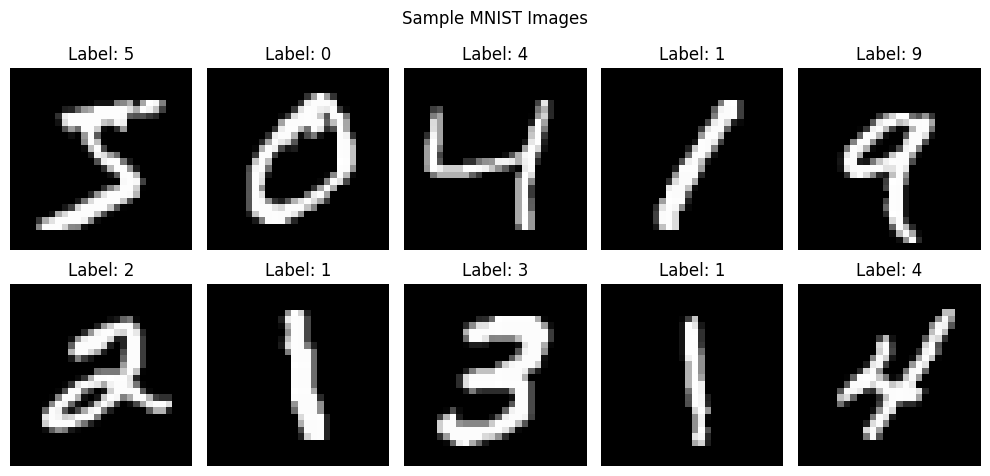

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    img = X.iloc[i].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.suptitle("Sample MNIST Images")
plt.tight_layout()
plt.show()

In [5]:
X = X.iloc[:20000]
y = y.iloc[:20000]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

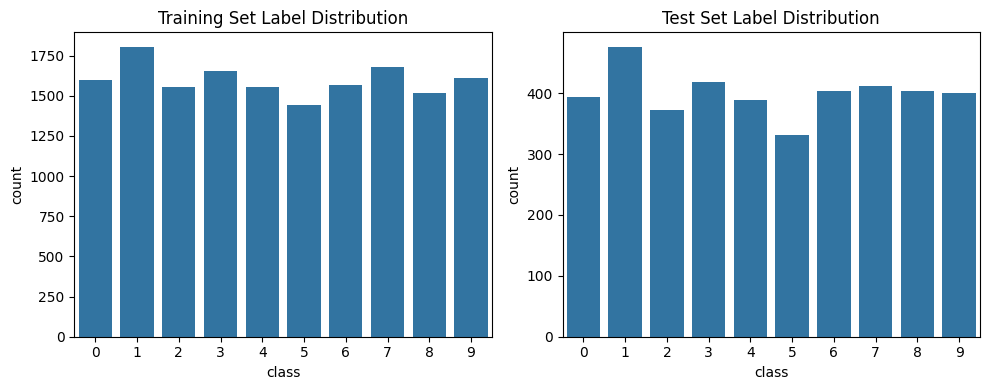

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Training Set Label Distribution")
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Test Set Label Distribution")
plt.tight_layout()
plt.show()

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 0.01],
    'kernel': ['rbf']
}

In [10]:
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=3, verbose=2, n_jobs=-1)
print("Starting grid search for hyperparameter tuning...")
grid_search.fit(X_train_scaled, y_train)

Starting grid search for hyperparameter tuning...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': ['scale', 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [11]:
print("Best parameters found:", grid_search.best_params_)
best_svc = grid_search.best_estimator_

Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [12]:
y_pred = best_svc.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9563


In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       394
           1       0.99      0.98      0.99       476
           2       0.95      0.94      0.94       372
           3       0.95      0.96      0.96       419
           4       0.97      0.95      0.96       389
           5       0.94      0.93      0.94       332
           6       0.96      0.96      0.96       403
           7       0.90      0.98      0.94       412
           8       0.96      0.94      0.95       403
           9       0.95      0.94      0.95       400

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



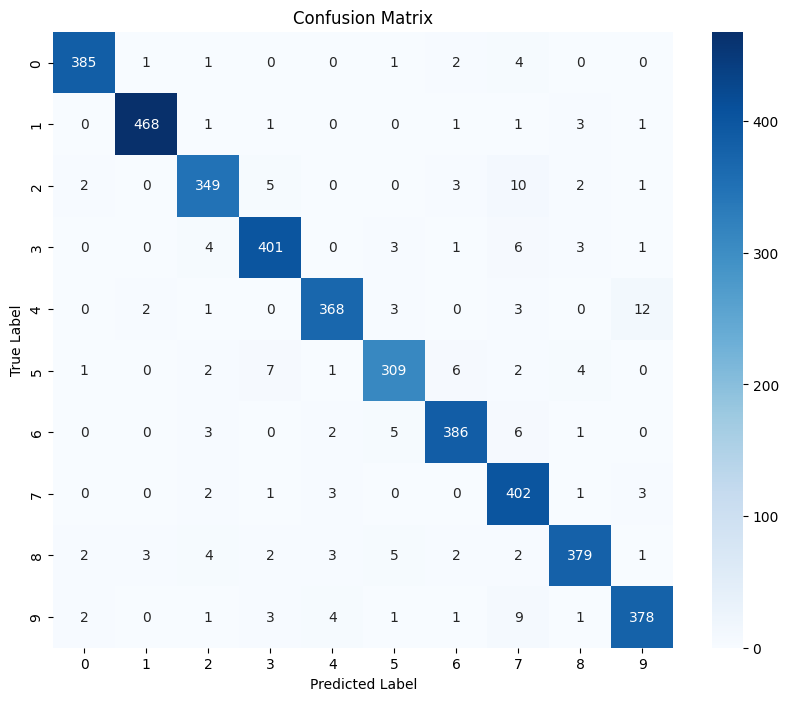

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

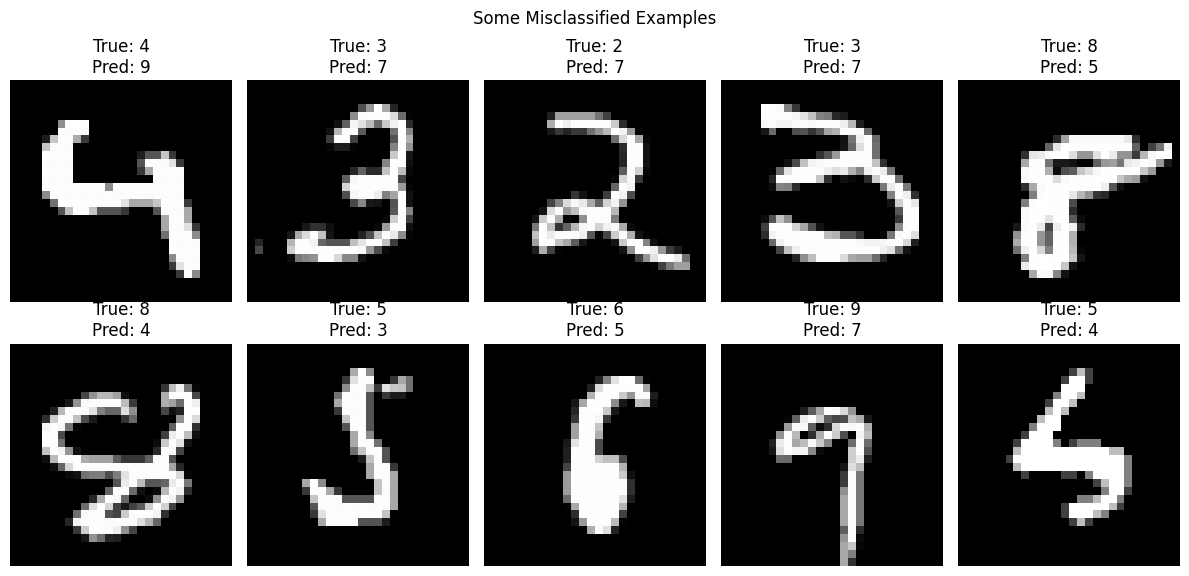

In [16]:
misclassified_indices = np.where(y_pred != y_test)[0]
if len(misclassified_indices) > 0:
    plt.figure(figsize=(12, 6))
    for i, index in enumerate(misclassified_indices[:10]):  # show 10 misclassified examples
        plt.subplot(2, 5, i+1)
        img = X_test.iloc[index].values.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {y_test.iloc[index]}\nPred: {y_pred[index]}")
        plt.axis("off")
    plt.suptitle("Some Misclassified Examples")
    plt.tight_layout()
    plt.show()
else:
    print("No misclassifications found!")